#  EDA & Hypothesis Testing on Huda Beauty Shade Inclusivity


This notebook analyzes whether Huda Beauty’s complexion product lines (foundations, concealers, skin tints) offer inclusive shade ranges across diverse skin tones, using the Fitzpatrick scale as a basis. We use Exploratory Data Analysis (EDA) and statistical hypothesis testing.


In [17]:

from google.colab import files
uploaded = files.upload()


Saving HudaBeautyr_Shades.xlsx to HudaBeautyr_Shades (1).xlsx


In [18]:

import pandas as pd

df = pd.read_excel('HudaBeautyr_Shades.xlsx')
df.head()


,Product Type,Product Line,Shade Name,Undertone,Skin Tone Description,Fitzpatrick Type,Launch Date,Average Rating
0,Foundation,#FauxFilter Luminous Matte Foundation,Milkshake 100B,Beige,Ultra fair skin with beige undertones,I,2017-10-13,4.6
1,Foundation,#FauxFilter Luminous Matte Foundation,Angel Food 110N,Neutral,Ultra fair skin with neutral undertones,I,2017-10-13,4.6
2,Foundation,#FauxFilter Luminous Matte Foundation,Vanilla 120B,Beige,Fair skin with pinky-beige undertones,II,2017-10-13,4.6
3,Foundation,#FauxFilter Luminous Matte Foundation,Panna Cotta 130G,Golden,Fair skin with golden undertones,II,2017-10-13,4.6
4,Foundation,#FauxFilter Luminous Matte Foundation,Cashew 140G,Golden,Fair skin with peachy-golden undertones,II,2017-10-13,4.6


In [19]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Type           166 non-null    object 
 1   Product Line           166 non-null    object 
 2   Shade Name             166 non-null    object 
 3   Undertone              166 non-null    object 
 4   Skin Tone Description  166 non-null    object 
 5   Fitzpatrick Type       166 non-null    object 
 6   Launch Date            166 non-null    object 
 7   Average Rating         166 non-null    float64
dtypes: float64(1), object(7)
memory usage: 10.5+ KB


In [20]:

df.describe()


df.describe(include=['object'])



,Product Type,Product Line,Shade Name,Undertone,Skin Tone Description,Fitzpatrick Type,Launch Date
count,166,166,166,166,166,166,166
unique,3,8,118,7,87,10,7
top,Foundation,#FauxFilter Luminous Matte Foundation,Angel Food 110N,Golden,Light skin with neutral undertones,VI,2017-10-13
freq,117,39,3,56,6,38,39



##  Exploratory Data Analysis (EDA)

This section explores the shade distribution across different features, including:
- Fitzpatrick skin types
- Undertones
- Product lines
- Launch dates
- Average product ratings

Visualizing this data helps reveal patterns and potential gaps in Huda Beauty’s inclusivity efforts before applying formal statistical tests.


<Axes: title={'center': 'Shade Count by Fitzpatrick Type'}, xlabel='Fitzpatrick Type'>

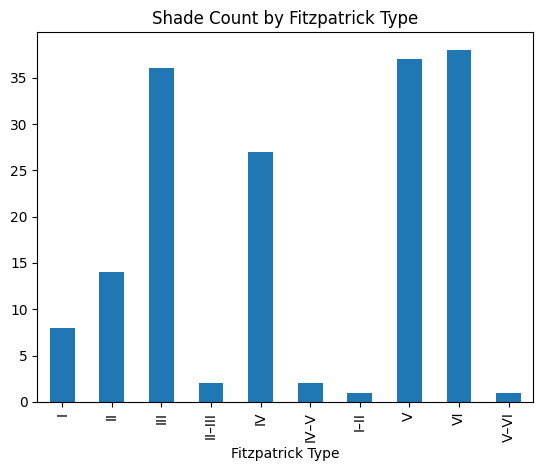

In [21]:
df['Fitzpatrick Type'].value_counts().sort_index().plot(kind='bar', title="Shade Count by Fitzpatrick Type")



<Axes: xlabel='Fitzpatrick Type'>

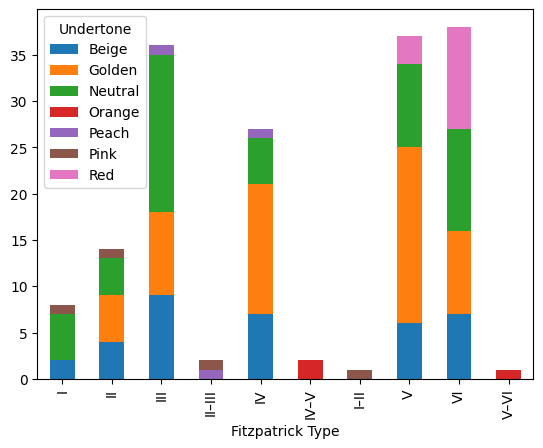

In [22]:

pd.crosstab(df['Fitzpatrick Type'], df['Undertone']).plot(kind='bar', stacked=True)


<Axes: title={'center': 'Shade Count by Product Line'}, ylabel='Product Line'>

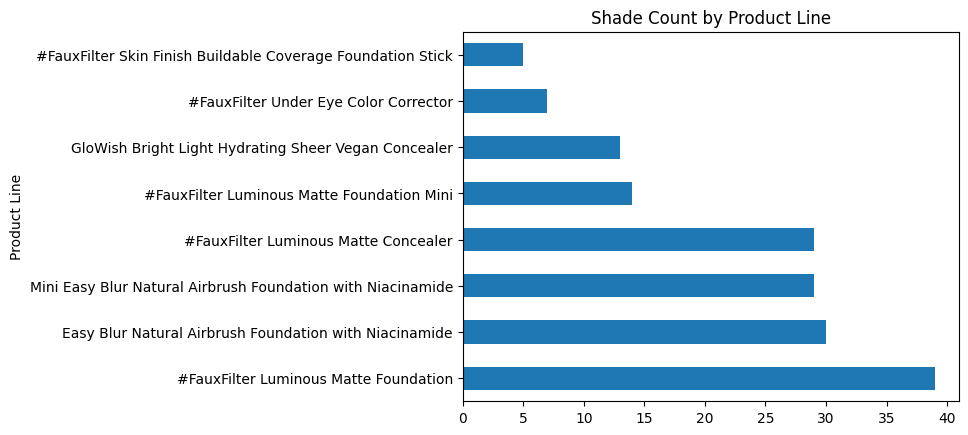

In [23]:
df['Product Line'].value_counts().plot(kind='barh', title="Shade Count by Product Line")



##  Hypothesis Testing: Shade Inclusivity

To evaluate inclusivity in Huda Beauty's complexion products, we formulate the following hypothesis:

- **Null Hypothesis (H₀):** Shades are evenly distributed across all Fitzpatrick skin types.
- **Alternative Hypothesis (H₁):** Some Fitzpatrick types are underrepresented in the shade distribution.

We use a **Chi-Square Goodness-of-Fit test** to statistically determine if the distribution of shades significantly differs from a uniform distribution.

If the p-value is **less than 0.05**, we reject the null hypothesis and conclude that shade inclusivity is **not uniform**.


In [24]:

from scipy.stats import chisquare

counts = df['Fitzpatrick Type'].value_counts().sort_index()
stat, p = chisquare(counts)

print(f"Chi-square test statistic: {stat:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("Reject the null hypothesis — the shade distribution is not uniform.")
else:
    print("Fail to reject the null hypothesis — shade distribution appears uniform.")


Chi-square test statistic: 141.71, p-value: 0.0000
Reject the null hypothesis — the shade distribution is not uniform.



###  Interpretation

Based on the chi-square test results:
- If `p < 0.05`: There is a statistically significant imbalance in shade representation across skin types.
- If `p ≥ 0.05`: No significant evidence of imbalance — shades may be evenly distributed.

This supports or challenges Huda Beauty’s inclusivity claims from a data-driven perspective.
